In [2]:

%load_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
from unet import UNet
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import torchsummaryX as tsx
from tqdm import tqdm

In [3]:
# purge torch cache
torch.cuda.empty_cache()

In [13]:
net = UNet(num_input_channels=3, num_output_channels=3, 
                   feature_scale=8, more_layers=1, 
                   concat_x=False, upsample_mode='deconv', 
                   pad='zero', norm_layer=torch.nn.InstanceNorm2d, need_sigmoid=True, need_bias=True).to(device)

In [14]:
tsx.summary(net, torch.zeros(1, 3, 256, 256).to(device))

                                                 Kernel Shape  \
Layer                                                           
0_start.conv1.0.Conv2d_0                         [3, 8, 3, 3]   
1_start.conv1.InstanceNorm2d_1                              -   
2_start.conv1.ReLU_2                                        -   
3_start.conv2.0.Conv2d_0                         [8, 8, 3, 3]   
4_start.conv2.InstanceNorm2d_1                              -   
5_start.conv2.ReLU_2                                        -   
6_down1.MaxPool2d_down                                      -   
7_down1.conv.conv1.0.Conv2d_0                   [8, 16, 3, 3]   
8_down1.conv.conv1.InstanceNorm2d_1                         -   
9_down1.conv.conv1.ReLU_2                                   -   
10_down1.conv.conv2.0.Conv2d_0                 [16, 16, 3, 3]   
11_down1.conv.conv2.InstanceNorm2d_1                        -   
12_down1.conv.conv2.ReLU_2                                  -   
13_down2.MaxPool2d_down  

C:\tools\Anaconda3\envs\torch\lib\site-packages\torchsummaryX\torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_start.conv1.0.Conv2d_0,"[3, 8, 3, 3]","[1, 8, 256, 256]",224.0,14155776.0
1_start.conv1.InstanceNorm2d_1,-,"[1, 8, 256, 256]",NaN,NaN
2_start.conv1.ReLU_2,-,"[1, 8, 256, 256]",NaN,NaN
3_start.conv2.0.Conv2d_0,"[8, 8, 3, 3]","[1, 8, 256, 256]",584.0,37748736.0
4_start.conv2.InstanceNorm2d_1,-,"[1, 8, 256, 256]",NaN,NaN
...,...,...,...,...
63_up1.conv.conv1.ReLU_1,-,"[1, 8, 256, 256]",NaN,NaN
64_up1.conv.conv2.0.Conv2d_0,"[8, 8, 3, 3]","[1, 8, 256, 256]",584.0,37748736.0
65_up1.conv.conv2.ReLU_1,-,"[1, 8, 256, 256]",NaN,NaN


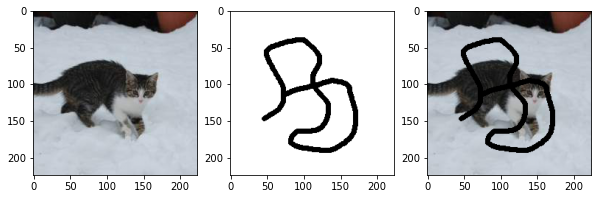

In [15]:
# read img file
img = plt.imread('cat.jpg') / 255
# load mask file
mask = plt.imread('mask.png') / 255
mask[mask > 0] = 1
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.subplot(1, 3, 3)
plt.imshow( (mask * img) )
img = torch.tensor(img).unsqueeze(0).permute(0, 3, 1, 2).float().to(device)
mask = torch.tensor(mask).unsqueeze(0).permute(0, 3, 1, 2).float().to(device)

In [16]:
net_input_saved = torch.randn(img.shape).to(device)

Iteration 00000    Loss 0.001881:   0%|          | 0/5000 [00:00<?, ?it/s]

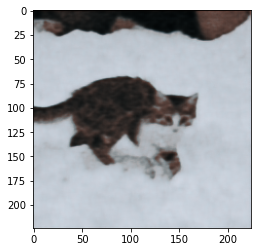

Iteration 00500    Loss 0.001858:  10%|█         | 500/5000 [00:36<05:22, 13.96it/s]

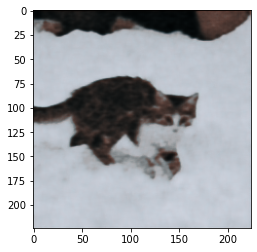

Iteration 01000    Loss 0.001796:  20%|██        | 1000/5000 [01:13<05:04, 13.12it/s]

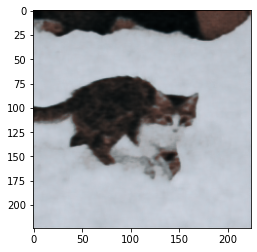

Iteration 01500    Loss 0.001706:  30%|███       | 1500/5000 [01:49<04:10, 13.95it/s]

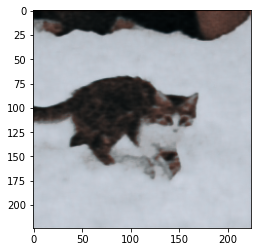

Iteration 02000    Loss 0.001660:  40%|████      | 2000/5000 [02:25<03:37, 13.82it/s]

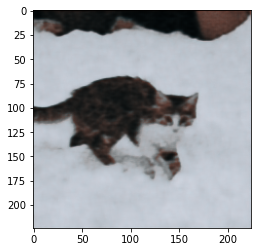

Iteration 02500    Loss 0.001662:  50%|█████     | 2500/5000 [03:01<03:08, 13.27it/s]

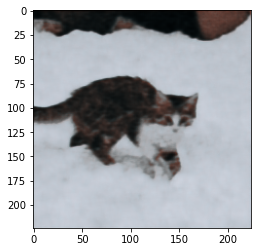

Iteration 03000    Loss 0.001533:  60%|██████    | 3000/5000 [03:37<02:25, 13.78it/s]

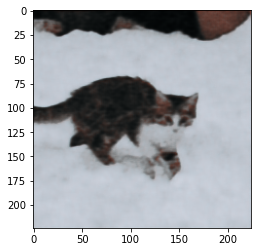

Iteration 03500    Loss 0.001543:  70%|███████   | 3500/5000 [04:13<01:46, 14.04it/s]

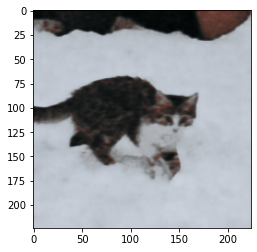

Iteration 04000    Loss 0.001536:  80%|████████  | 4000/5000 [04:49<01:11, 13.91it/s]

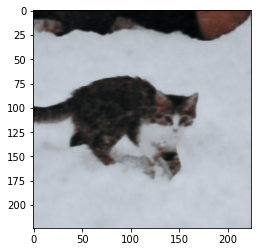

Iteration 04500    Loss 0.001391:  90%|█████████ | 4500/5000 [05:25<00:35, 14.00it/s]

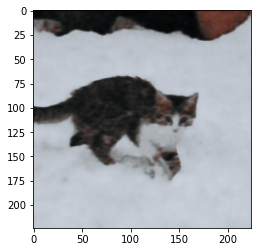

Iteration 04999    Loss 0.001284: 100%|██████████| 5000/5000 [06:01<00:00, 13.84it/s]


In [19]:
mse = torch.nn.MSELoss()
BATCH_SIZE = 16
def closure(net, img, mask, itr, pbar, reg_noise_std = 0.05, plot_interval = 500):
    
    # for n in [x for x in net.parameters() if len(x.size()) == 4]:
    #     n = n + n.detach().clone().normal_() * n.std() / 50
    
    net_input = net_input_saved
    noise_shape = list(net_input.shape)
    noise_shape[0] = BATCH_SIZE
    noise = torch.randn(noise_shape).to(device) * reg_noise_std
    net_input = net_input_saved + noise
        
        
    out = net(net_input)
    errors = (out * mask) - (img * mask)
    total_loss = (errors ** 2).sum()/ (BATCH_SIZE * img.shape[2] * img.shape[3])
    total_loss.backward()
        
    pbar.set_description ('Iteration %05d    Loss %f' % (itr, total_loss.item()))
    if itr % plot_interval == 0:
        out_np = out[0].detach().cpu().permute(1, 2, 0).numpy()
        plt.imshow(out_np)
        plt.show()

    return net_input, total_loss

LR = 1.0
num_iter = 5000
optimizer = torch.optim.Adadelta(net.parameters(), lr=LR)
pbar = tqdm(range(num_iter), position=0, leave=True)
for itr in range(num_iter):
    optimizer.zero_grad()
    net_input, total_loss = closure(net, img, mask, itr, pbar)
    optimizer.step()
    pbar.update()
pbar.close()

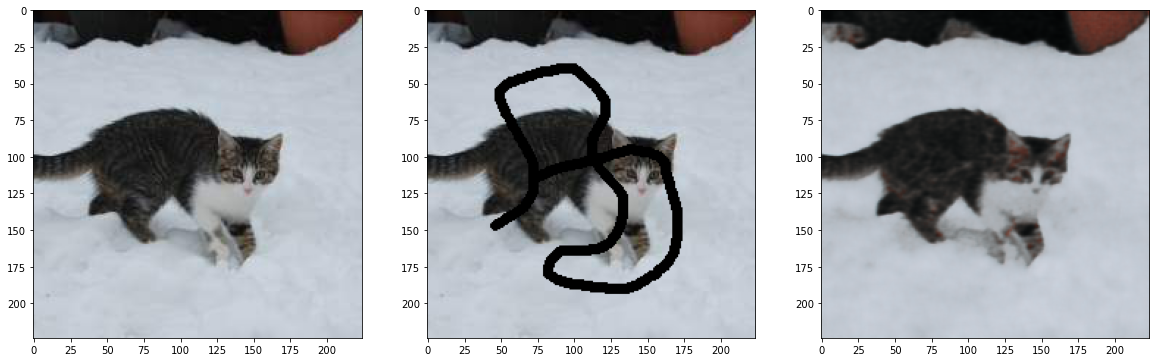

In [21]:
img_out = net(net_input_saved)[0].detach().cpu().permute(1, 2, 0).numpy()
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img[0].permute(1, 2, 0).cpu())
plt.subplot(1, 3, 2)
plt.imshow(mask[0].permute(1, 2, 0).cpu() * img[0].permute(1, 2, 0).cpu())
plt.subplot(1, 3, 3)
plt.imshow(img_out)